In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pylab import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('steam.csv')
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [5]:
feature = [i for i in df.columns if i not in ['appid', 'name']]
# pd.set_option('display.max_columns', None)
print(feature)

['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']


In [6]:
df['owners'].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [7]:
num_feature = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
cat_feature = ['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags']
cols = ['0-20000', '20000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000-2000000', '2000000-5000000', 
        '5000000-10000000', '10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000']
recols = pd.Series(['0-20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1m', '1m-2m', '2m-5m', '5m-10m', '10m-20m', '20m-50m', 
                    '50m-100m', '100m-200m'])

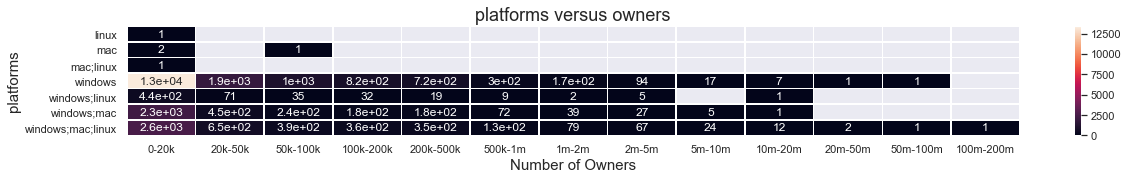

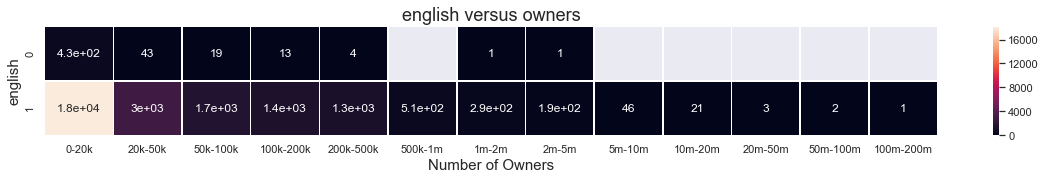

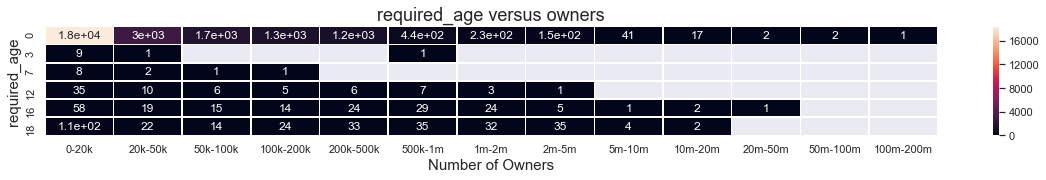

In [34]:
for feature in ['platforms', 'english', 'required_age']:
    group = df.groupby([feature, 'owners'])['name']
    group = group.count().to_frame()
    fea_owners = group.reset_index()
    fea_owners = fea_owners.pivot(index=feature,columns='owners',values='name')
    fea_owners = fea_owners[cols]
    figure(figsize = (20,2))
    fea_owners.columns = recols
    sns.set()
    ax = sns.heatmap(fea_owners, annot=True, linewidths=.5)
    ax.set_title(feature + ' versus owners', fontsize = 18)
    ax.set_xlabel('Number of Owners', fontsize = 15)
    ax.set_ylabel(feature, fontsize = 15, rotation = 'vertical')
    plt.savefig(feature + ' versus owners.png')
    plt.show()

In [8]:
df.eval('total_ratings = positive_ratings + negative_ratings', inplace = True)

In [10]:
df.eval('positive_ratio = positive_ratings / total_ratings', inplace  = True)

In [14]:
temp = list(df['owners'])
y = [cols.index(i) for i in temp]

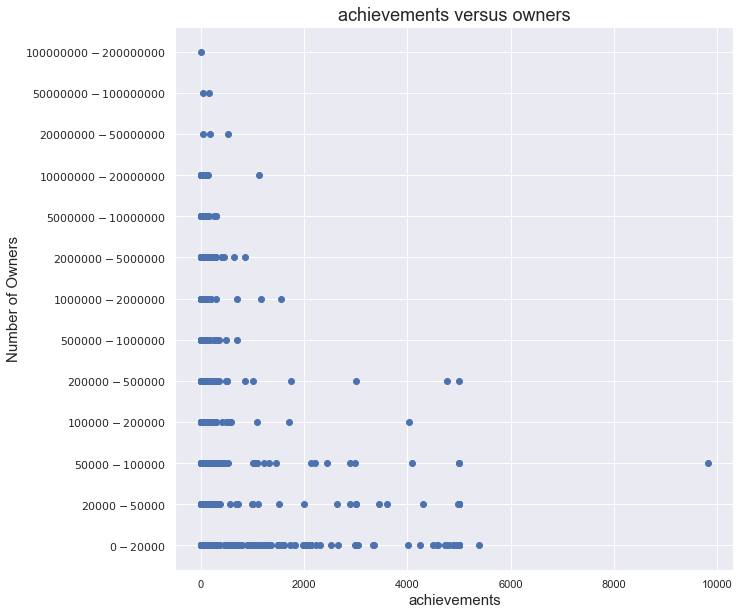

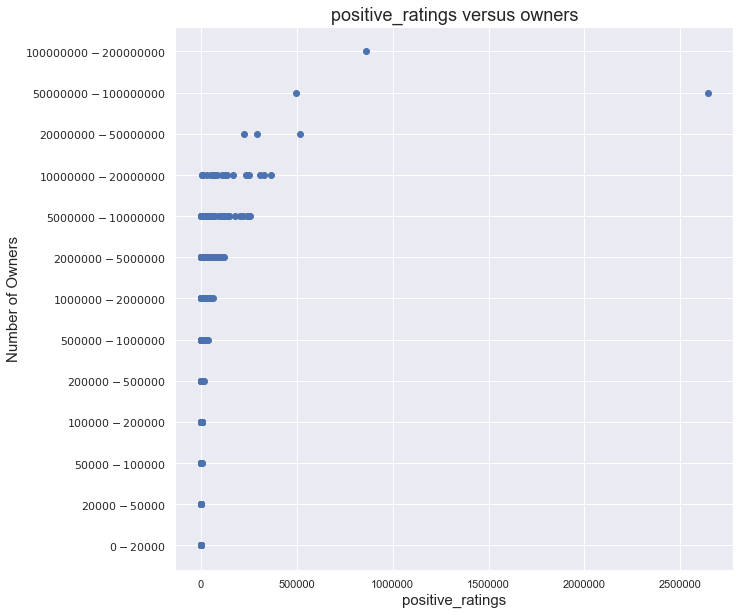

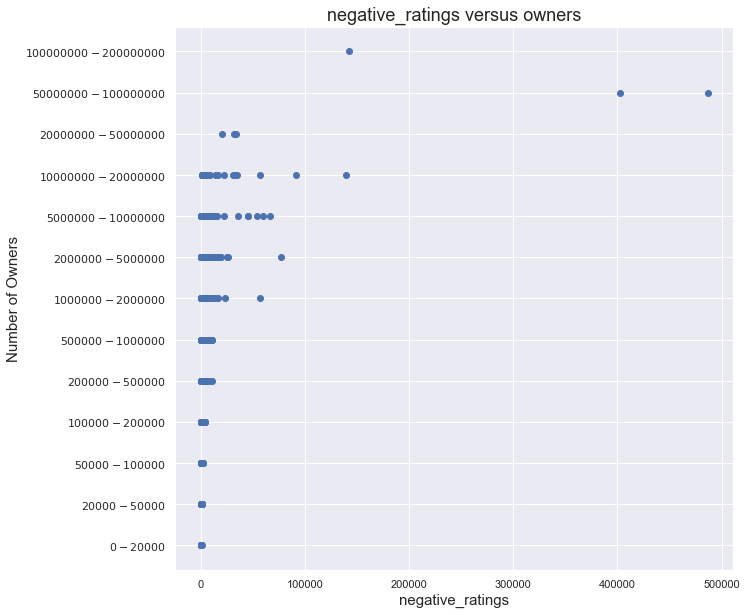

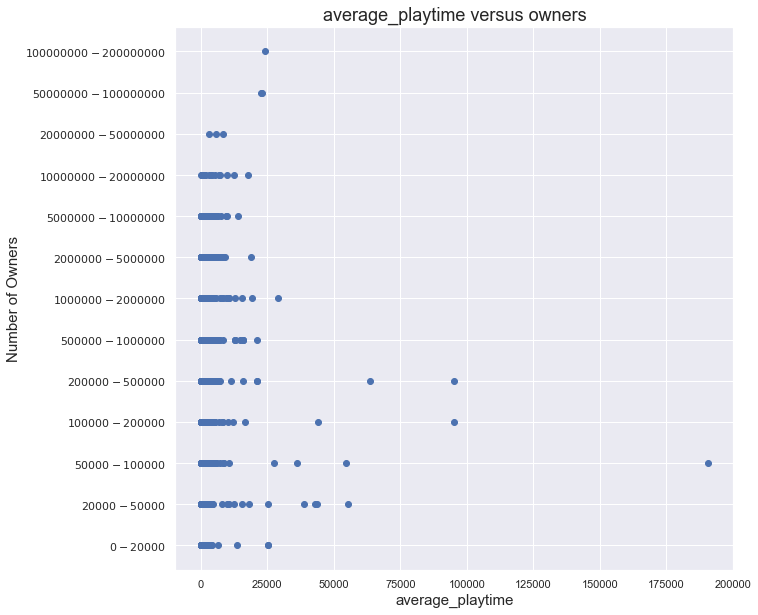

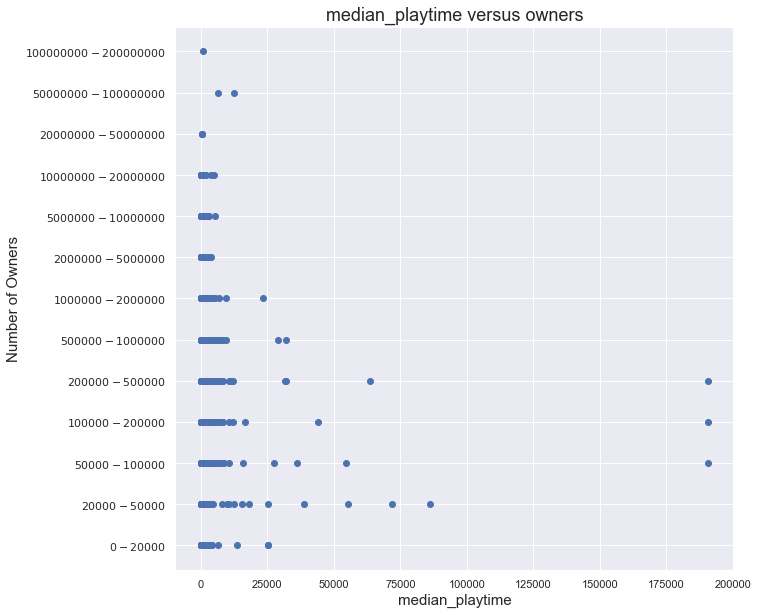

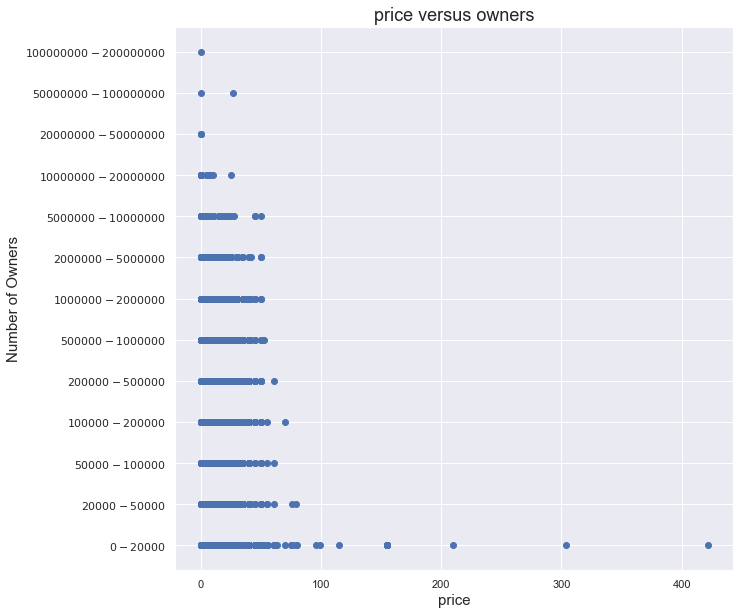

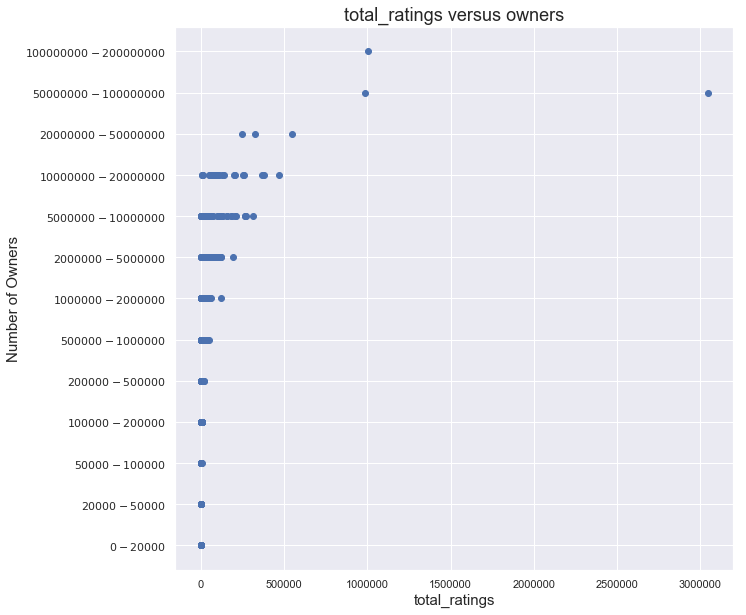

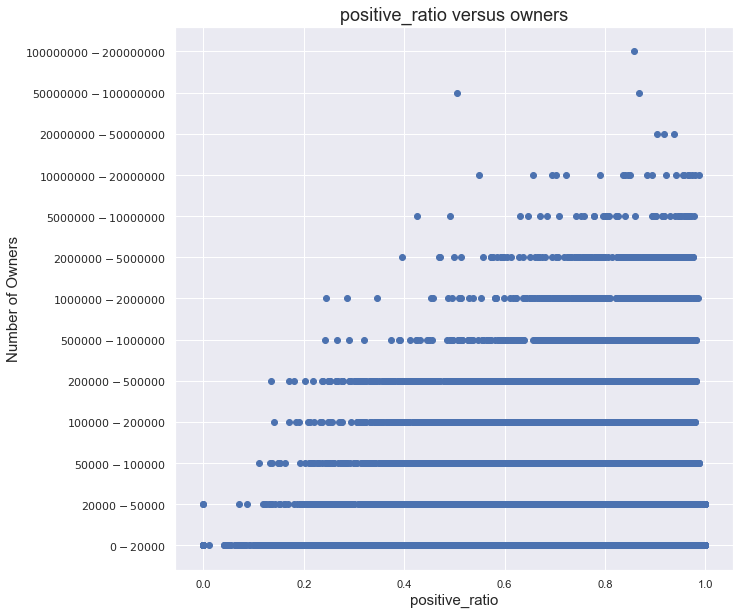

In [73]:
for feature in ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 
                'total_ratings', 'positive_ratio']:
    x = list(df[feature])
    figure(figsize = (10, 10))
    plt.scatter(x, y)
    plt.title(feature + ' versus owners', fontsize = 18)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('Number of Owners', fontsize = 15)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               [r'$0-20000$', r'$20000-50000$', r'$50000-100000$', r'$100000-200000$', r'$200000-500000$', r'$500000-1000000$', 
                r'$1000000-2000000$', r'$2000000-5000000$', r'$5000000-10000000$', r'$10000000-20000000$', r'$20000000-50000000$', 
                r'$50000000-100000000$', r'$100000000-200000000$'])
    plt.grid(True)
    plt.savefig(feature + ' versus owners.png')
    plt.show()

In [15]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'total_ratings', 'positive_ratio'],
      dtype='object')

In [17]:
# 'genres'
# 'developer'
genres = df['genres'].value_counts()
genres

Action;Indie                                                                              1852
Casual;Indie                                                                              1482
Action;Adventure;Indie                                                                    1229
Adventure;Indie                                                                           1170
Action;Casual;Indie                                                                       1004
Action                                                                                     843
Adventure;Casual;Indie                                                                     801
Indie                                                                                      759
Casual                                                                                     560
Adventure                                                                                  535
Adventure;Casual                                  

Text(0.5, 1.0, 'Developers')

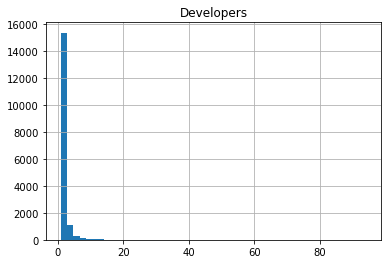

In [27]:
devs = df['developer'].value_counts()
f,ax = plt.subplots()
devs.hist(bins=50)
plt.title('Developers')


Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price',
       'total_ratings', 'positive_ratio'],
      dtype='object')

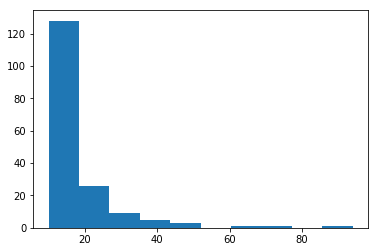

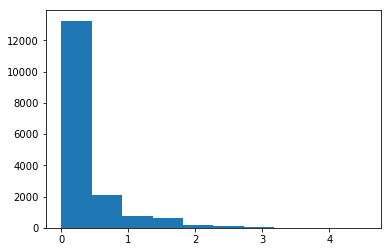

In [51]:
# hist for developpers
# filter out some small developers
threshold = 10
big_devs = devs.values[devs.values >= threshold]
f,ax = plt.subplots()
ax.hist(big_devs)

# lnd
ln_devs = np.log(devs.values)
f,ax = plt.subplots()
ax.hist(ln_devs)

df.columns

In [69]:
# devs vs owners

IndentationError: unexpected indent (<ipython-input-69-4ea55fb717d7>, line 4)

In [82]:
gr_devs = pd.merge(df,devs.to_frame().reset_index(),
         how='left',left_on='developer',right_on='index',
         suffixes=('_x','_num_games')).drop(columns=['index'])
gr_devs['sales_cap'] = gr_devs['owners'].str.split('-').str[-1].astype('int')
gr_devs['sales_cup'] = gr_devs['owners'].str.split('-').str[0].astype('int')
# group by devs number of published games
gr_devs = gr_devs.groupby(['developer_x']).agg({'sales_cap':'sum',
                                    'sales_cup':'sum',
                                    'appid':'count'})
gr_devs.head()

,sales_cap,sales_cup,appid
developer_x,,,
#workshop,20000,0,1
'What Day is it?' Games,20000,0,1
(STCG) Smoker The Car Game,20000,0,1
+7 Software,20000,0,1
"+Mpact Games, LLC.",20000,0,1


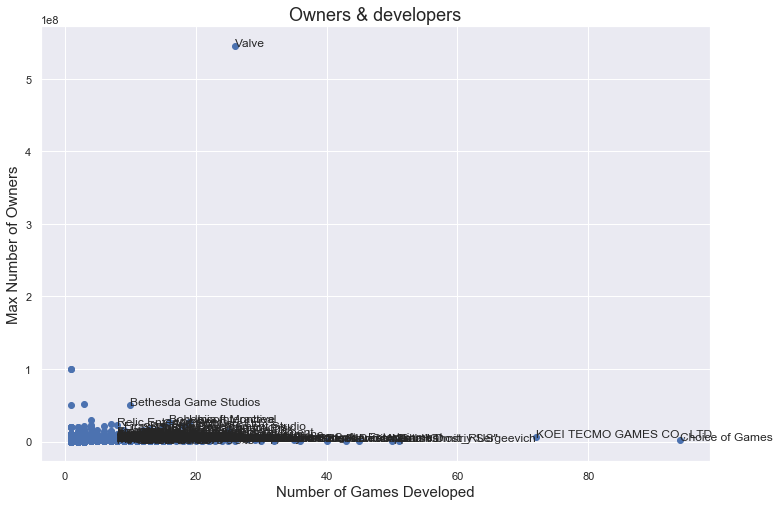

In [145]:
# filter_out low-sale devs
threshold = 0
gr_devs = gr_devs[gr_devs['sales_cup']!=threshold].reset_index()
f,ax = plt.subplots(figsize = (12,8))
ax.scatter(x=gr_devs['appid'],y = gr_devs['sales_cap'])
# to annotate
annotate_threshold = 8
annotate = gr_devs[gr_devs['appid']>=annotate_threshold].reset_index(drop=True)
for i, txt in enumerate(annotate['developer_x']):
    ax.annotate(txt, (annotate['appid'][i], annotate['sales_cap'][i]))
ax.set_title('Owners & developers', fontsize = 18)
ax.set_xlabel('Number of Games Developed', fontsize = 15)
ax.set_ylabel('Max Number of Owners', fontsize = 15, rotation = 'vertical')
f.savefig('Developer_Owner.png',bbox_inches='tight')
plt.show()



In [200]:
# explore genres
# integer encode
genres = df['genres'].str.split(';',expand=True)
all_genres = set()
for col in genres:
    all_genres.update(genres[col].unique())
all_genres=list(all_genres)
all_genres_sorted = []
for x in all_genres:
    if x != None:
        all_genres_sorted.append(x)
all_genres_sorted.sort()
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(all_genres_sorted)
# print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)


# invert first example
# inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
# print(inverted)

onehot_encoded = onehot_encoded.tolist()
onehot_encoded = [np.array(x) for x in onehot_encoded]

C:\Users\as12c\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [197]:
# replace by interger encode
# genres_int = genres.replace(all_genres_sorted,integer_encoded.flatten().astype('int').tolist())
# replace by binary encode
# onehot_encoded = onehot_encoded.tolist()
# onehot_encoded = [np.array(x) for x in onehot_encoded]
# genres_bi = genres.replace(all_genres_sorted,onehot_encoded)
# genres_bi.head()
# # maybe a more useful format
# genres_bi_2 = genres_bi.sum(axis=1)
# genres_bi_2.head()

In [221]:
# make genres_bi_2 like [1,0,1,0,1...]
# all_genres to onthot_encoded
m_str = genres.values
genres_bi = np.empty((m_str.shape[0],onehot_encoded[1].shape[0]))

for row_num in range(m_str.shape[0]):
    row_iter = np.zeros(onehot_encoded[0].shape[0])
    for col_num in range(m_str[row_num].shape[0]):
        tag = m_str[row_num,col_num]
        if tag != None:
            row_iter += onehot_encoded[all_genres_sorted.index(tag)]
    genres_bi[row_num] = row_iter

genres_bi_df = pd.DataFrame(data = genres_bi, dtype=np.int8)
genres_bi_df.columns = all_genres_sorted
df_gen_bi = pd.concat([df, genres_bi_df], axis=1)
print(df_gen_bi.head())

   appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  ...  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action  ...   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action  ...   
2              Multi-player;V

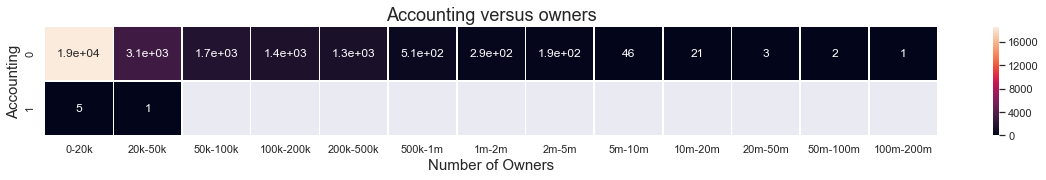

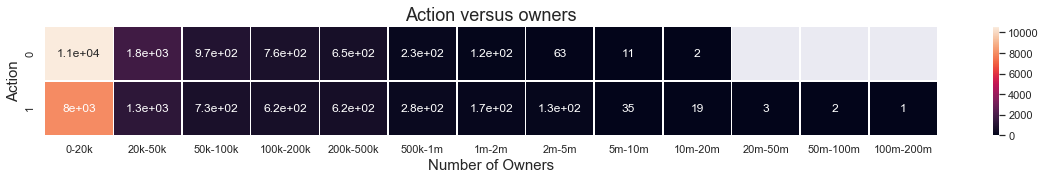

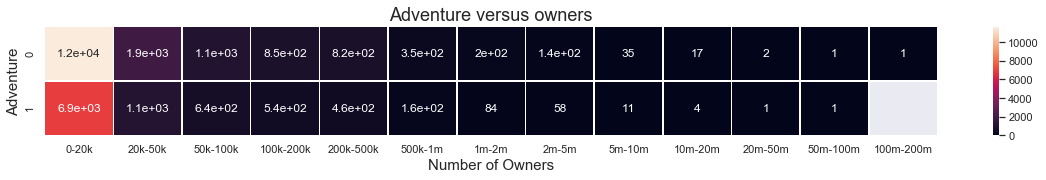

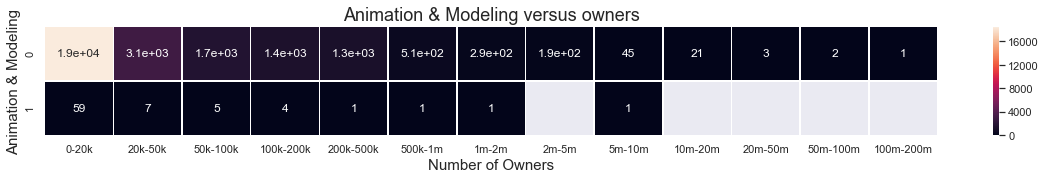

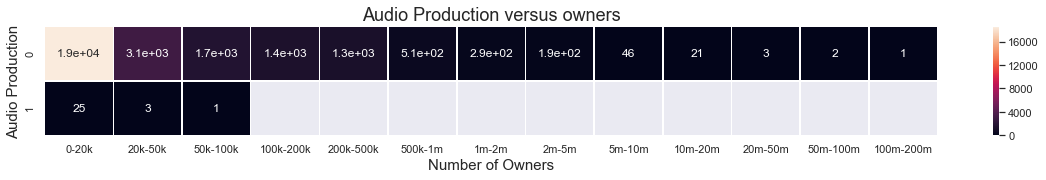

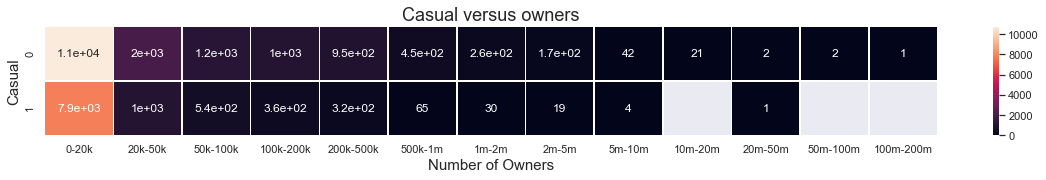

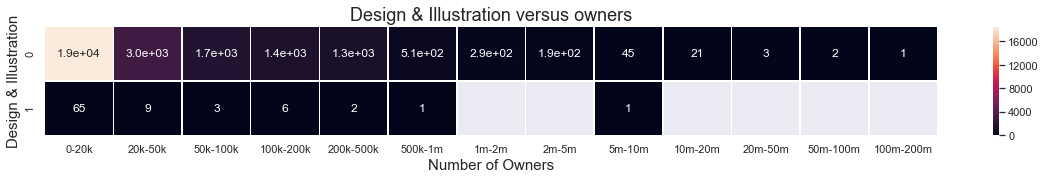

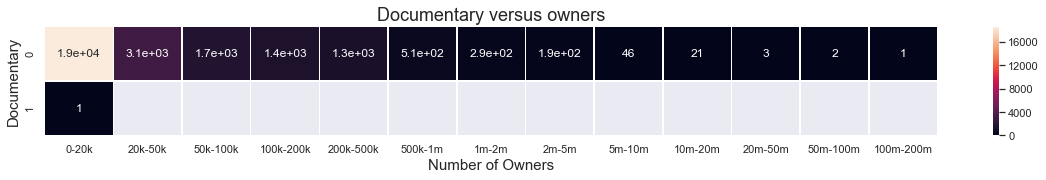

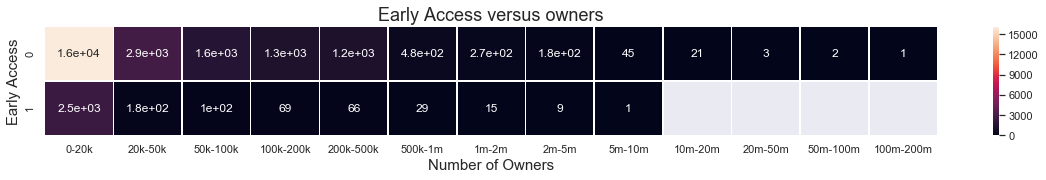

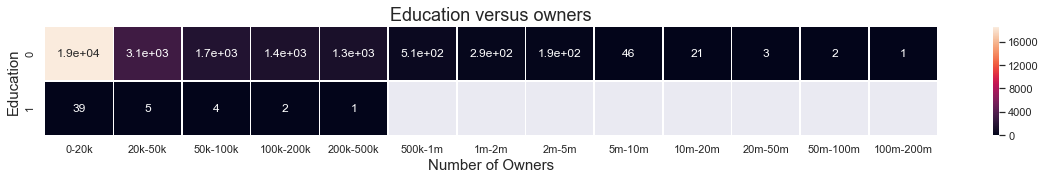

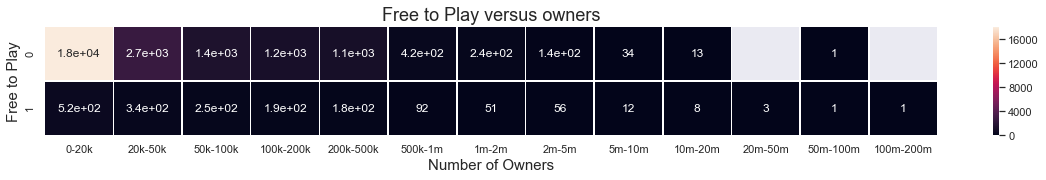

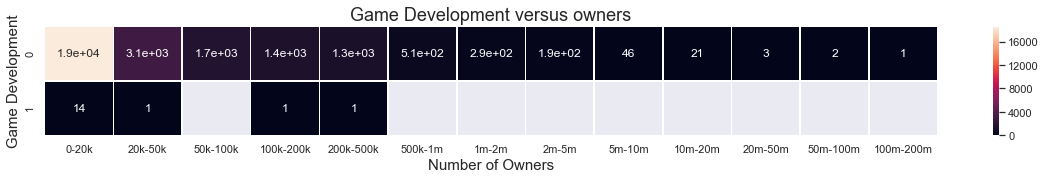

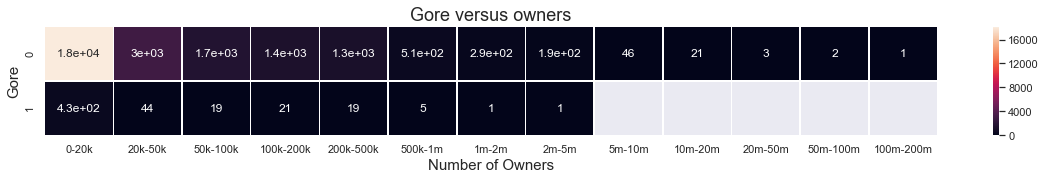

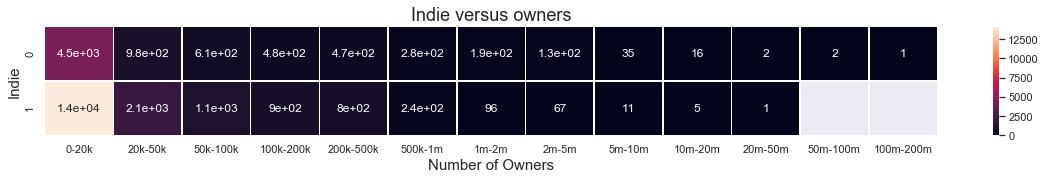

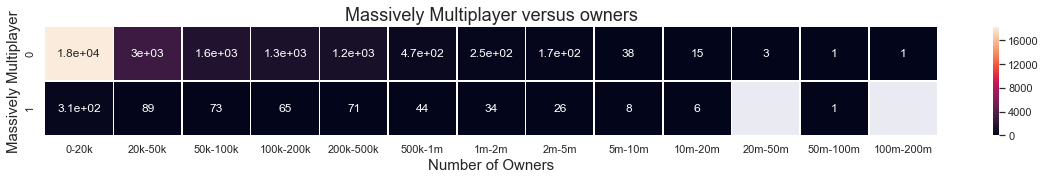

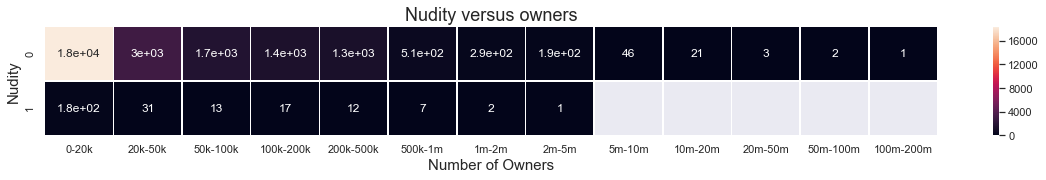

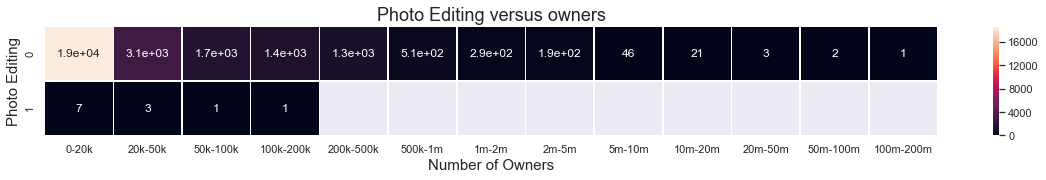

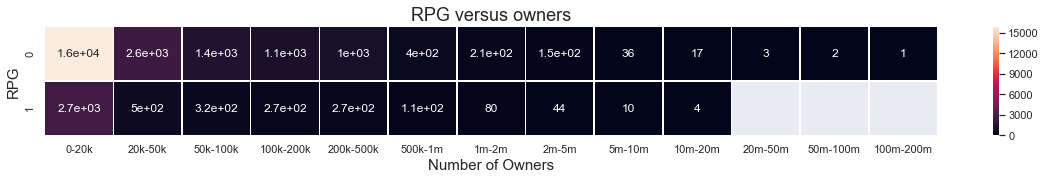

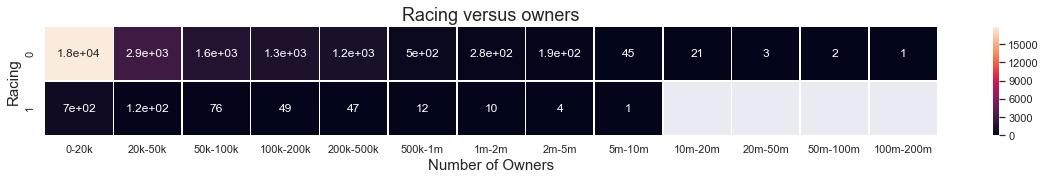

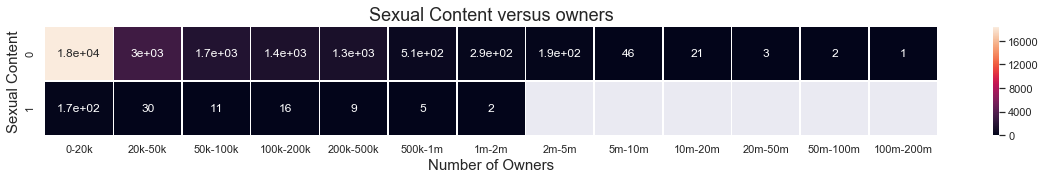

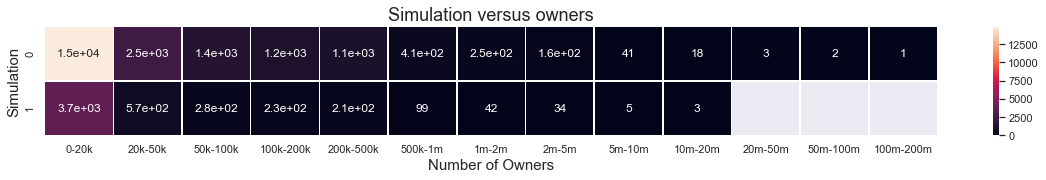

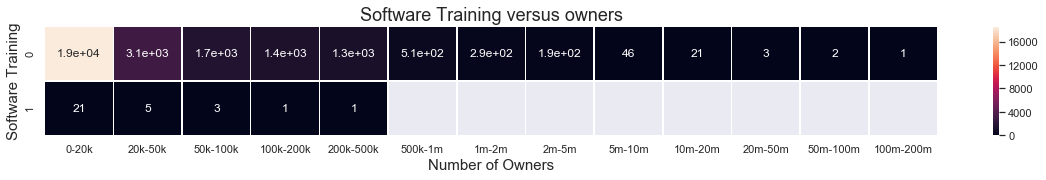

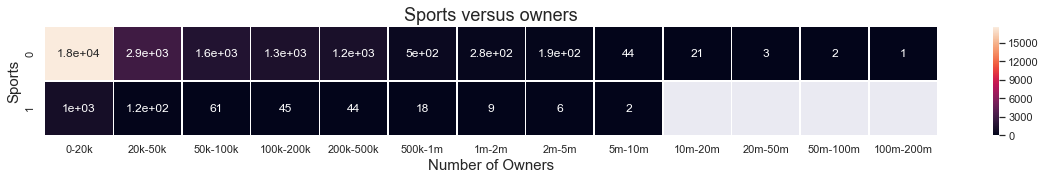

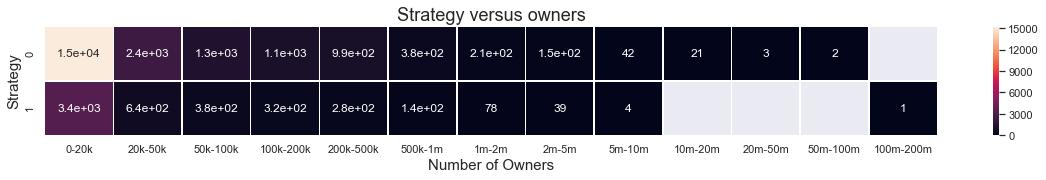

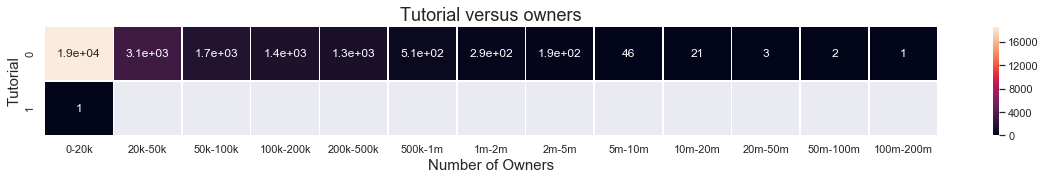

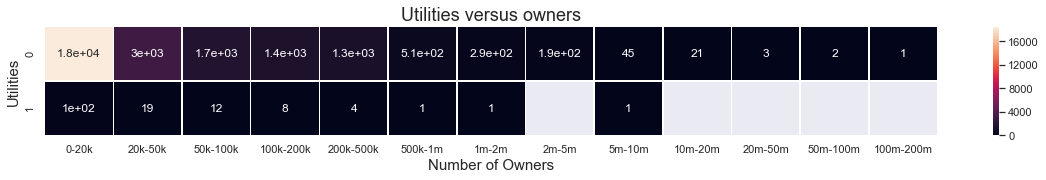

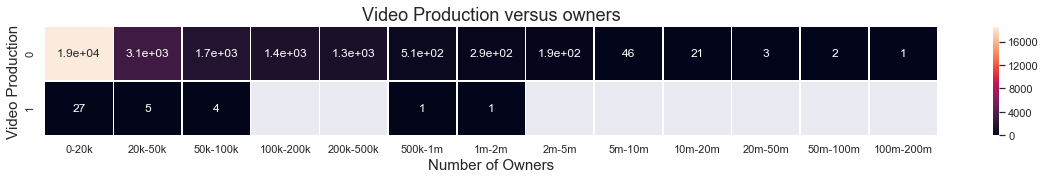

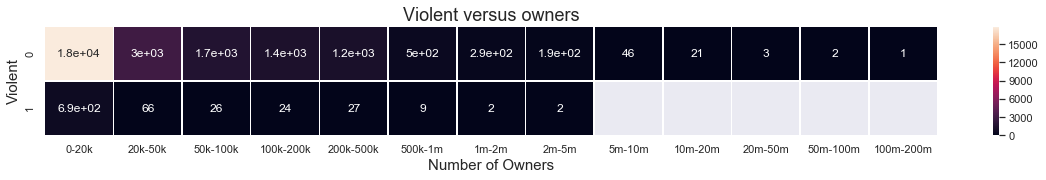

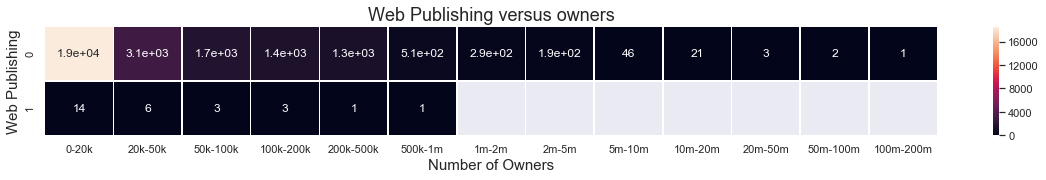

In [226]:
# know we can do like heatmap but should we?
for feature in all_genres_sorted:
    group = df_gen_bi.groupby(['owners',feature]).agg({'appid':'count'})
    fea_owners = group.reset_index()
    fea_owners = fea_owners.pivot(index=feature,columns='owners',values='appid')
    fea_owners = fea_owners[cols]
    figure(figsize = (20,2))
    fea_owners.columns = recols
    sns.set()
    ax = sns.heatmap(fea_owners, annot=True, linewidths=.5)
    ax.set_title(feature + ' versus owners', fontsize = 18)
    ax.set_xlabel('Number of Owners', fontsize = 15)
    ax.set_ylabel(feature, fontsize = 15, rotation = 'vertical')
    plt.savefig(feature + ' versus owners.png')
    plt.show()